In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()




from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('3.01. Country clusters.csv')

In [7]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [10]:
# Defining Features
x = data.iloc[:,1:3]

In [23]:
kmeans = KMeans(3)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [24]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([2, 2, 0, 0, 0, 1], dtype=int32)

In [25]:
data_with_clusters = data.copy()
data_with_clusters['Clusters'] = identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


<function matplotlib.pyplot.show(*args, **kw)>

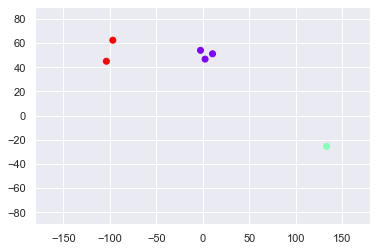

In [26]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'], c = data_with_clusters['Clusters'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

## Mapping Categorical Data

In [27]:
data_mapped = data.copy()

In [31]:
data_mapped['Language'] = data['Language'].map({'English':0,'French':1,'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [41]:
x = data_mapped.iloc[:,1:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


In [42]:
kmeans2 = KMeans(3)
kmeans2.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [43]:
identified_clusters2 = kmeans.fit_predict(x)
identified_clusters2

array([2, 2, 0, 0, 0, 1], dtype=int32)

In [44]:
data_mapped_clustered = data.copy()
data_mapped_clustered['Clusters'] = identified_clusters2
data_mapped_clustered

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,2
1,Canada,62.40,-96.80,English,2
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


<function matplotlib.pyplot.show(*args, **kw)>

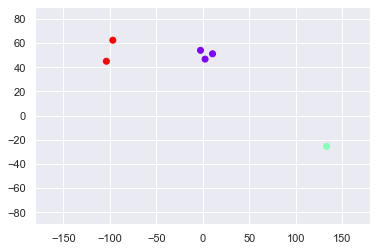

In [49]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'], c = data_mapped_clustered['Clusters'], cmap = 'rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

## Selecting the Number of Clusters

## WCSS

In [50]:
kmeans.inertia_

290.10523333333333

In [51]:
wcss = []
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [52]:
wcss

[42605.41356666667,
 13208.95812,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

## The Elbow Method

<function matplotlib.pyplot.show(*args, **kw)>

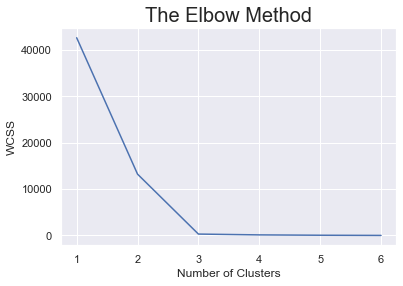

In [54]:
number_clusters = range(1,7)
plt.plot(number_clusters, wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show